# 50 Startups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
startups=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\50_Startups.csv")
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


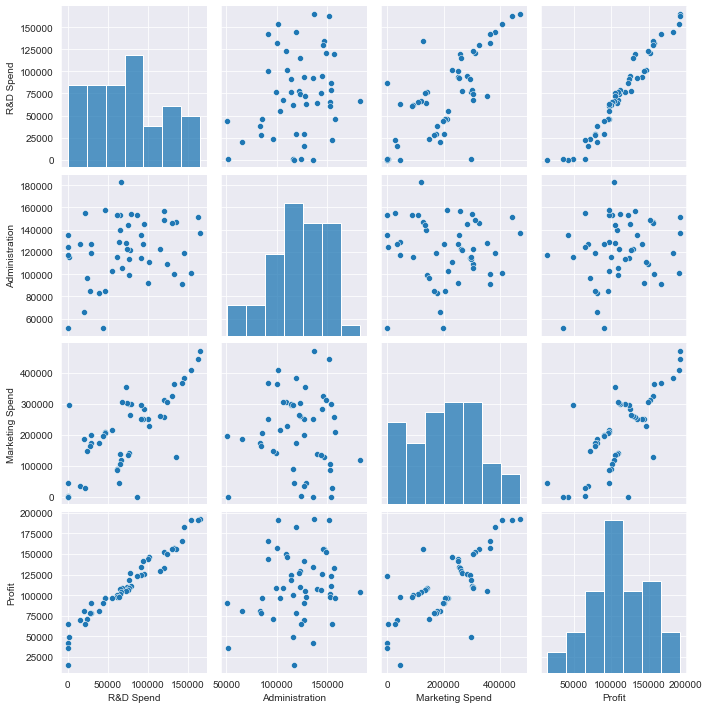

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [7]:
startups['Marketing_Spend']=startups['Marketing Spend']
startups

,R&D Spend,Administration,Marketing Spend,State,Profit,Marketing_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,471784.10
1,162597.70,151377.59,443898.53,California,191792.06,443898.53
2,153441.51,101145.55,407934.54,Florida,191050.39,407934.54
3,144372.41,118671.85,383199.62,New York,182901.99,383199.62
4,142107.34,91391.77,366168.42,Florida,166187.94,366168.42
5,131876.90,99814.71,362861.36,New York,156991.12,362861.36
6,134615.46,147198.87,127716.82,California,156122.51,127716.82
7,130298.13,145530.06,323876.68,Florida,155752.60,323876.68
8,120542.52,148718.95,311613.29,New York,152211.77,311613.29
9,123334.88,108679.17,304981.62,California,149759.96,304981.62


In [8]:
startups['Research_Develop_Spend']=startups['R&D Spend']
startups

,R&D Spend,Administration,Marketing Spend,State,Profit,Marketing_Spend,Research_Develop_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,471784.10,165349.20
1,162597.70,151377.59,443898.53,California,191792.06,443898.53,162597.70
2,153441.51,101145.55,407934.54,Florida,191050.39,407934.54,153441.51
3,144372.41,118671.85,383199.62,New York,182901.99,383199.62,144372.41
4,142107.34,91391.77,366168.42,Florida,166187.94,366168.42,142107.34
5,131876.90,99814.71,362861.36,New York,156991.12,362861.36,131876.90
6,134615.46,147198.87,127716.82,California,156122.51,127716.82,134615.46
7,130298.13,145530.06,323876.68,Florida,155752.60,323876.68,130298.13
8,120542.52,148718.95,311613.29,New York,152211.77,311613.29,120542.52
9,123334.88,108679.17,304981.62,California,149759.96,304981.62,123334.88


In [9]:
model=smf.ols('Profit~Research_Develop_Spend+Administration+State+Profit+Marketing_Spend',data=startups).fit()

In [11]:
model.fittedvalues

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
dtype: float64

In [12]:
model.resid

0    -2.910383e-11
1     0.000000e+00
2     0.000000e+00
3    -5.820766e-11
4     0.000000e+00
5    -5.820766e-11
6    -5.820766e-11
7     0.000000e+00
8    -5.820766e-11
9    -2.910383e-11
10   -2.910383e-11
11   -5.820766e-11
12   -2.910383e-11
13   -5.820766e-11
14   -2.910383e-11
15   -5.820766e-11
16   -2.910383e-11
17   -5.820766e-11
18    0.000000e+00
19   -1.018634e-10
20   -2.910383e-11
21   -4.365575e-11
22    1.455192e-11
23    1.455192e-11
24   -8.731149e-11
25   -5.820766e-11
26   -2.910383e-11
27   -4.365575e-11
28   -2.910383e-11
29   -8.731149e-11
30   -2.910383e-11
31   -7.275958e-11
32   -7.275958e-11
33   -1.455192e-11
34   -4.365575e-11
35   -5.820766e-11
36    0.000000e+00
37   -4.365575e-11
38   -5.820766e-11
39   -2.910383e-11
40   -2.910383e-11
41    0.000000e+00
42   -4.365575e-11
43   -8.731149e-11
44   -6.548362e-11
45   -9.458745e-11
46    2.182787e-11
47   -6.548362e-11
48   -9.458745e-11
49   -5.638867e-11
dtype: float64

In [13]:
model.pvalues

Intercept                 0.254926
State[T.Florida]          0.147960
State[T.New York]         0.189004
Research_Develop_Spend    0.828083
Administration            0.928382
Profit                    0.000000
Marketing_Spend           0.066627
dtype: float64

In [14]:
model.params

Intercept                 6.912160e-11
State[T.Florida]         -2.910383e-11
State[T.New York]         2.546585e-11
Research_Develop_Spend    1.665335e-16
Administration           -2.775558e-17
Profit                    1.000000e+00
Marketing_Spend          -1.942890e-16
dtype: float64

In [15]:
ml_v=smf.ols('Profit~Administration',data=startups).fit()
ml_v

In [16]:
ml_v1=smf.ols('Profit~Research_Develop_Spend',data=startups).fit()
ml_v1

In [17]:
startups['Predicted']=model.fittedvalues
startups['Error']=model.resid
startups

,R&D Spend,Administration,Marketing Spend,State,Profit,Marketing_Spend,Research_Develop_Spend,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,471784.10,165349.20,192261.83,-2.910383e-11
1,162597.70,151377.59,443898.53,California,191792.06,443898.53,162597.70,191792.06,0.000000e+00
2,153441.51,101145.55,407934.54,Florida,191050.39,407934.54,153441.51,191050.39,0.000000e+00
3,144372.41,118671.85,383199.62,New York,182901.99,383199.62,144372.41,182901.99,-5.820766e-11
4,142107.34,91391.77,366168.42,Florida,166187.94,366168.42,142107.34,166187.94,0.000000e+00
5,131876.90,99814.71,362861.36,New York,156991.12,362861.36,131876.90,156991.12,-5.820766e-11
6,134615.46,147198.87,127716.82,California,156122.51,127716.82,134615.46,156122.51,-5.820766e-11
7,130298.13,145530.06,323876.68,Florida,155752.60,323876.68,130298.13,155752.60,0.000000e+00
8,120542.52,148718.95,311613.29,New York,152211.77,311613.29,120542.52,152211.77,-5.820766e-11
9,123334.88,108679.17,304981.62,California,149759.96,304981.62,123334.88,149759.96,-2.910383e-11


In [18]:
rsq_RD=smf.ols('Profit~Administration+Marketing_Spend+State',data=startups).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Admin=smf.ols('Profit~Research_Develop_Spend+Marketing_Spend+State',data=startups).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Marketing=smf.ols('Profit~Research_Develop_Spend+Administration+State',data=startups).fit().rsquared
vif_Marketing=1/(1-rsq_Marketing)

rsq_State=smf.ols('Profit~Administration+Marketing_Spend+Research_Develop_Spend',data=startups).fit().rsquared
vif_State=1/(1-rsq_State)

d1={'Variables':['RD','Admin','Marketing','State'],'VIF':[vif_RD,vif_Admin,vif_Marketing,vif_State]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RD,2.584697
1,Admin,20.182981
2,Marketing,19.223350
3,State,20.302917


In [19]:
model.resid

0    -2.910383e-11
1     0.000000e+00
2     0.000000e+00
3    -5.820766e-11
4     0.000000e+00
5    -5.820766e-11
6    -5.820766e-11
7     0.000000e+00
8    -5.820766e-11
9    -2.910383e-11
10   -2.910383e-11
11   -5.820766e-11
12   -2.910383e-11
13   -5.820766e-11
14   -2.910383e-11
15   -5.820766e-11
16   -2.910383e-11
17   -5.820766e-11
18    0.000000e+00
19   -1.018634e-10
20   -2.910383e-11
21   -4.365575e-11
22    1.455192e-11
23    1.455192e-11
24   -8.731149e-11
25   -5.820766e-11
26   -2.910383e-11
27   -4.365575e-11
28   -2.910383e-11
29   -8.731149e-11
30   -2.910383e-11
31   -7.275958e-11
32   -7.275958e-11
33   -1.455192e-11
34   -4.365575e-11
35   -5.820766e-11
36    0.000000e+00
37   -4.365575e-11
38   -5.820766e-11
39   -2.910383e-11
40   -2.910383e-11
41    0.000000e+00
42   -4.365575e-11
43   -8.731149e-11
44   -6.548362e-11
45   -9.458745e-11
46    2.182787e-11
47   -6.548362e-11
48   -9.458745e-11
49   -5.638867e-11
dtype: float64

E:\Personal Docs\Python\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


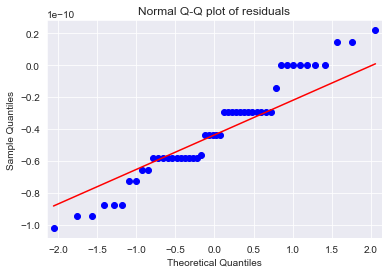

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

E:\Personal Docs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Error'>

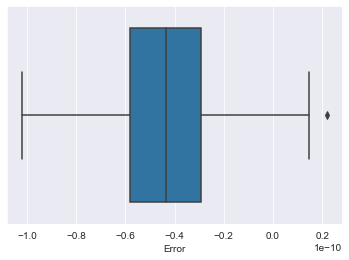

In [21]:
sns.boxplot(startups['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

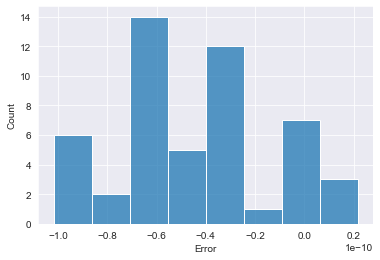

In [22]:
sns.histplot(startups['Error'])

In [23]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0     1.990990
1     1.979335
2     1.960934
3     1.758771
4     1.344094
5     1.115920
6     1.094370
7     1.085192
8     0.997344
9     0.936514
10    0.846255
11    0.800045
12    0.733706
13    0.553134
14    0.510840
15    0.444210
16    0.371662
17    0.331407
18    0.304029
19    0.267061
20    0.160308
21   -0.017358
22   -0.041194
23   -0.081344
24   -0.085858
25   -0.114332
26   -0.155785
27   -0.173778
28   -0.216599
29   -0.273109
30   -0.299583
31   -0.360468
32   -0.361850
33   -0.377950
34   -0.379590
35   -0.385378
36   -0.528565
37   -0.547397
38   -0.763743
39   -0.769283
40   -0.837904
41   -0.848848
42   -1.005160
43   -1.048317
44   -1.161418
45   -1.168222
46   -1.551174
47   -1.723133
48   -1.893983
49   -2.414797
dtype: float64
0     0.389181
1     1.329801
2     1.329801
3    -0.551438
4     1.329801
5    -0.551438
6    -0.551438
7     1.329801
8    -0.551438
9     0.389181
10    0.389181
11   -0.551438
12    0.389181
13   -0.551438
14    0.389181
15   -0.55

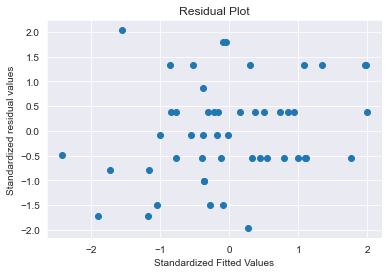

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

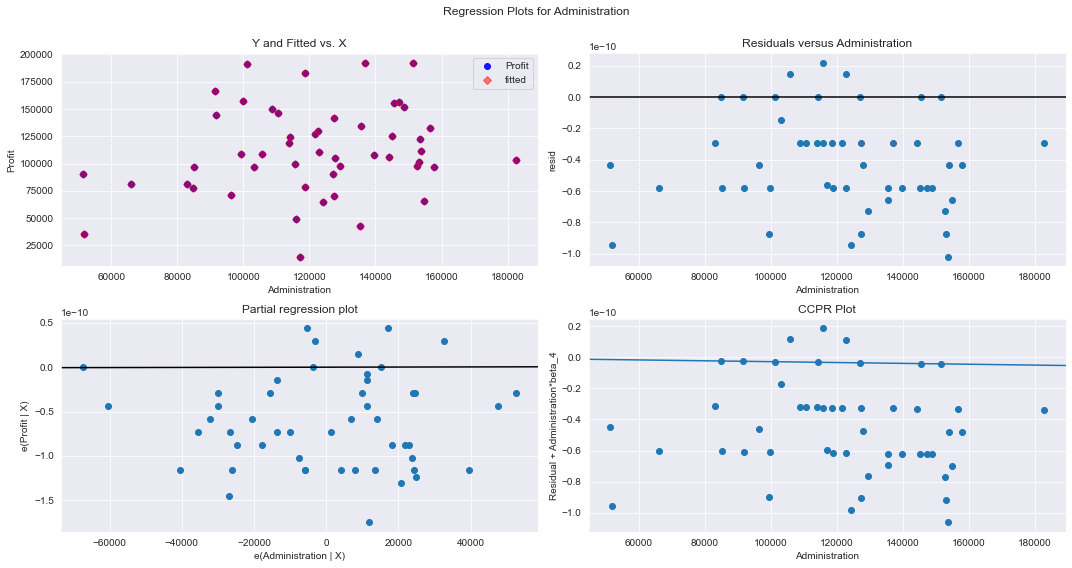

In [25]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

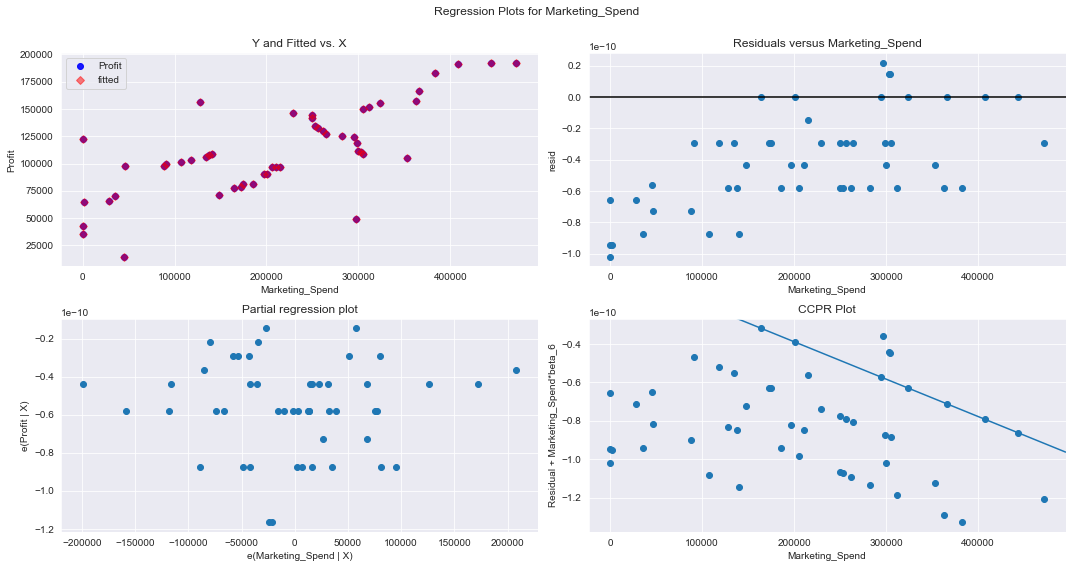

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)
plt.show()

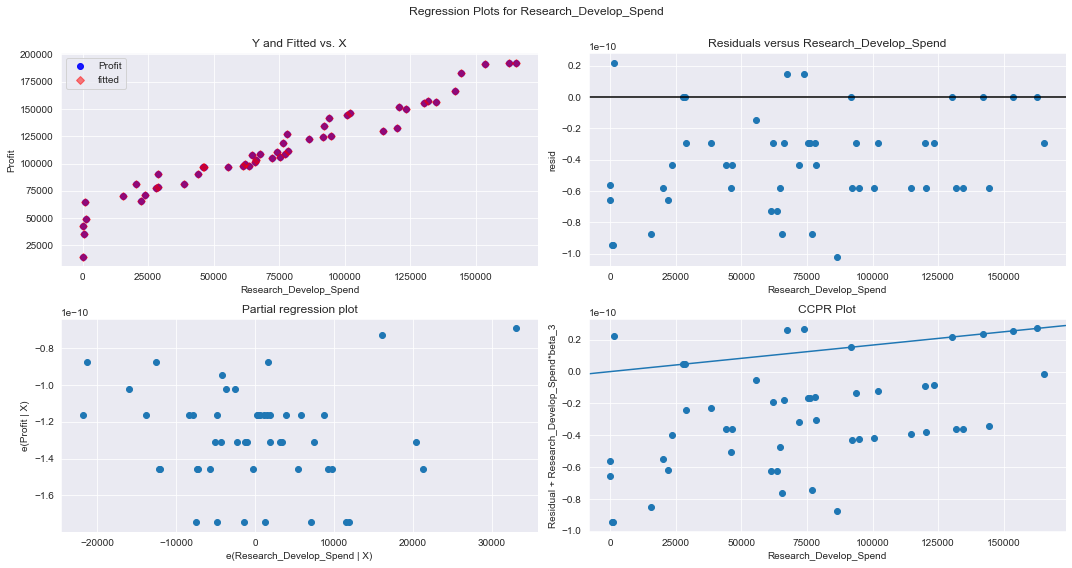

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Research_Develop_Spend",fig=fig)
plt.show()

In [28]:
startups.shape

(50, 9)

In [29]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([0.00979676, 0.        , 0.        , 0.02885017, 0.        ,
       0.02637332, 0.05435032, 0.        , 0.0185488 , 0.00559986,
       0.00597226, 0.02647784, 0.00514505, 0.01586391, 0.01058547,
       0.03066658, 0.00470415, 0.01777037, 0.        , 0.18139423,
       0.00415681, 0.01745974, 0.0009989 , 0.00101617, 0.04599435,
       0.01448315, 0.00522818, 0.02177523, 0.01064803, 0.04259159,
       0.00593223, 0.03147699, 0.03580404, 0.00087197, 0.0191837 ,
       0.02143402, 0.        , 0.0248087 , 0.04631515, 0.00484583,
       0.0041451 , 0.        , 0.00931659, 0.06158715, 0.03303853,
       0.13490483, 0.01180058, 0.03270066, 0.25899655, 0.15363723])

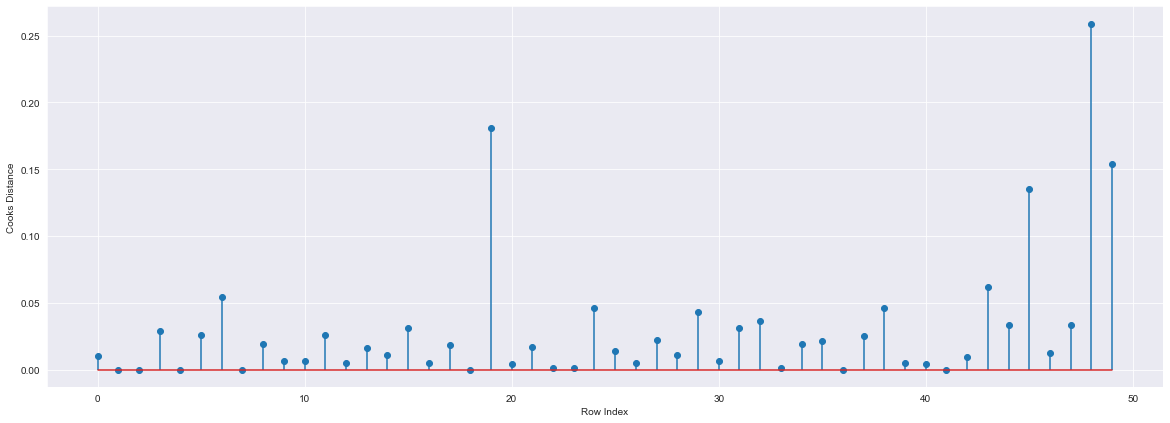

In [30]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(48, 0.2589965537531124)

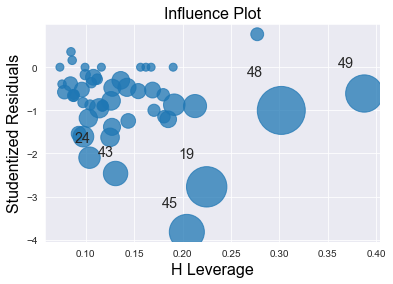

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
k=4
n=50
leverage_cutoff= 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [34]:
startups[startups.index.isin([48])]

,R&D Spend,Administration,Marketing Spend,State,Profit,Marketing_Spend,Research_Develop_Spend,Predicted,Error
48,542.05,51743.15,0.0,New York,35673.41,0.0,542.05,35673.41,-9.458745e-11


In [35]:
startup1=startups.drop(startups.index[48],axis=0).reset_index()

In [36]:
startup1.shape

(49, 10)

In [37]:
startup1=startup1.drop(['index'],axis=1)
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit,Marketing_Spend,Research_Develop_Spend,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,471784.10,165349.20,192261.83,-2.910383e-11
1,162597.70,151377.59,443898.53,California,191792.06,443898.53,162597.70,191792.06,0.000000e+00
2,153441.51,101145.55,407934.54,Florida,191050.39,407934.54,153441.51,191050.39,0.000000e+00
3,144372.41,118671.85,383199.62,New York,182901.99,383199.62,144372.41,182901.99,-5.820766e-11
4,142107.34,91391.77,366168.42,Florida,166187.94,366168.42,142107.34,166187.94,0.000000e+00
5,131876.90,99814.71,362861.36,New York,156991.12,362861.36,131876.90,156991.12,-5.820766e-11
6,134615.46,147198.87,127716.82,California,156122.51,127716.82,134615.46,156122.51,-5.820766e-11
7,130298.13,145530.06,323876.68,Florida,155752.60,323876.68,130298.13,155752.60,0.000000e+00
8,120542.52,148718.95,311613.29,New York,152211.77,311613.29,120542.52,152211.77,-5.820766e-11
9,123334.88,108679.17,304981.62,California,149759.96,304981.62,123334.88,149759.96,-2.910383e-11


In [38]:
final_ml_v=smf.ols('Profit~Administration+Marketing_Spend+State+Research_Develop_Spend',data=startup1).fit()

In [39]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.9500769803429849, 1039.602772519403)

# Toyota

In [42]:
toyota=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\ToyotaCorolla.csv",encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
toyota1=toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [46]:
toyota1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [47]:
toyota1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


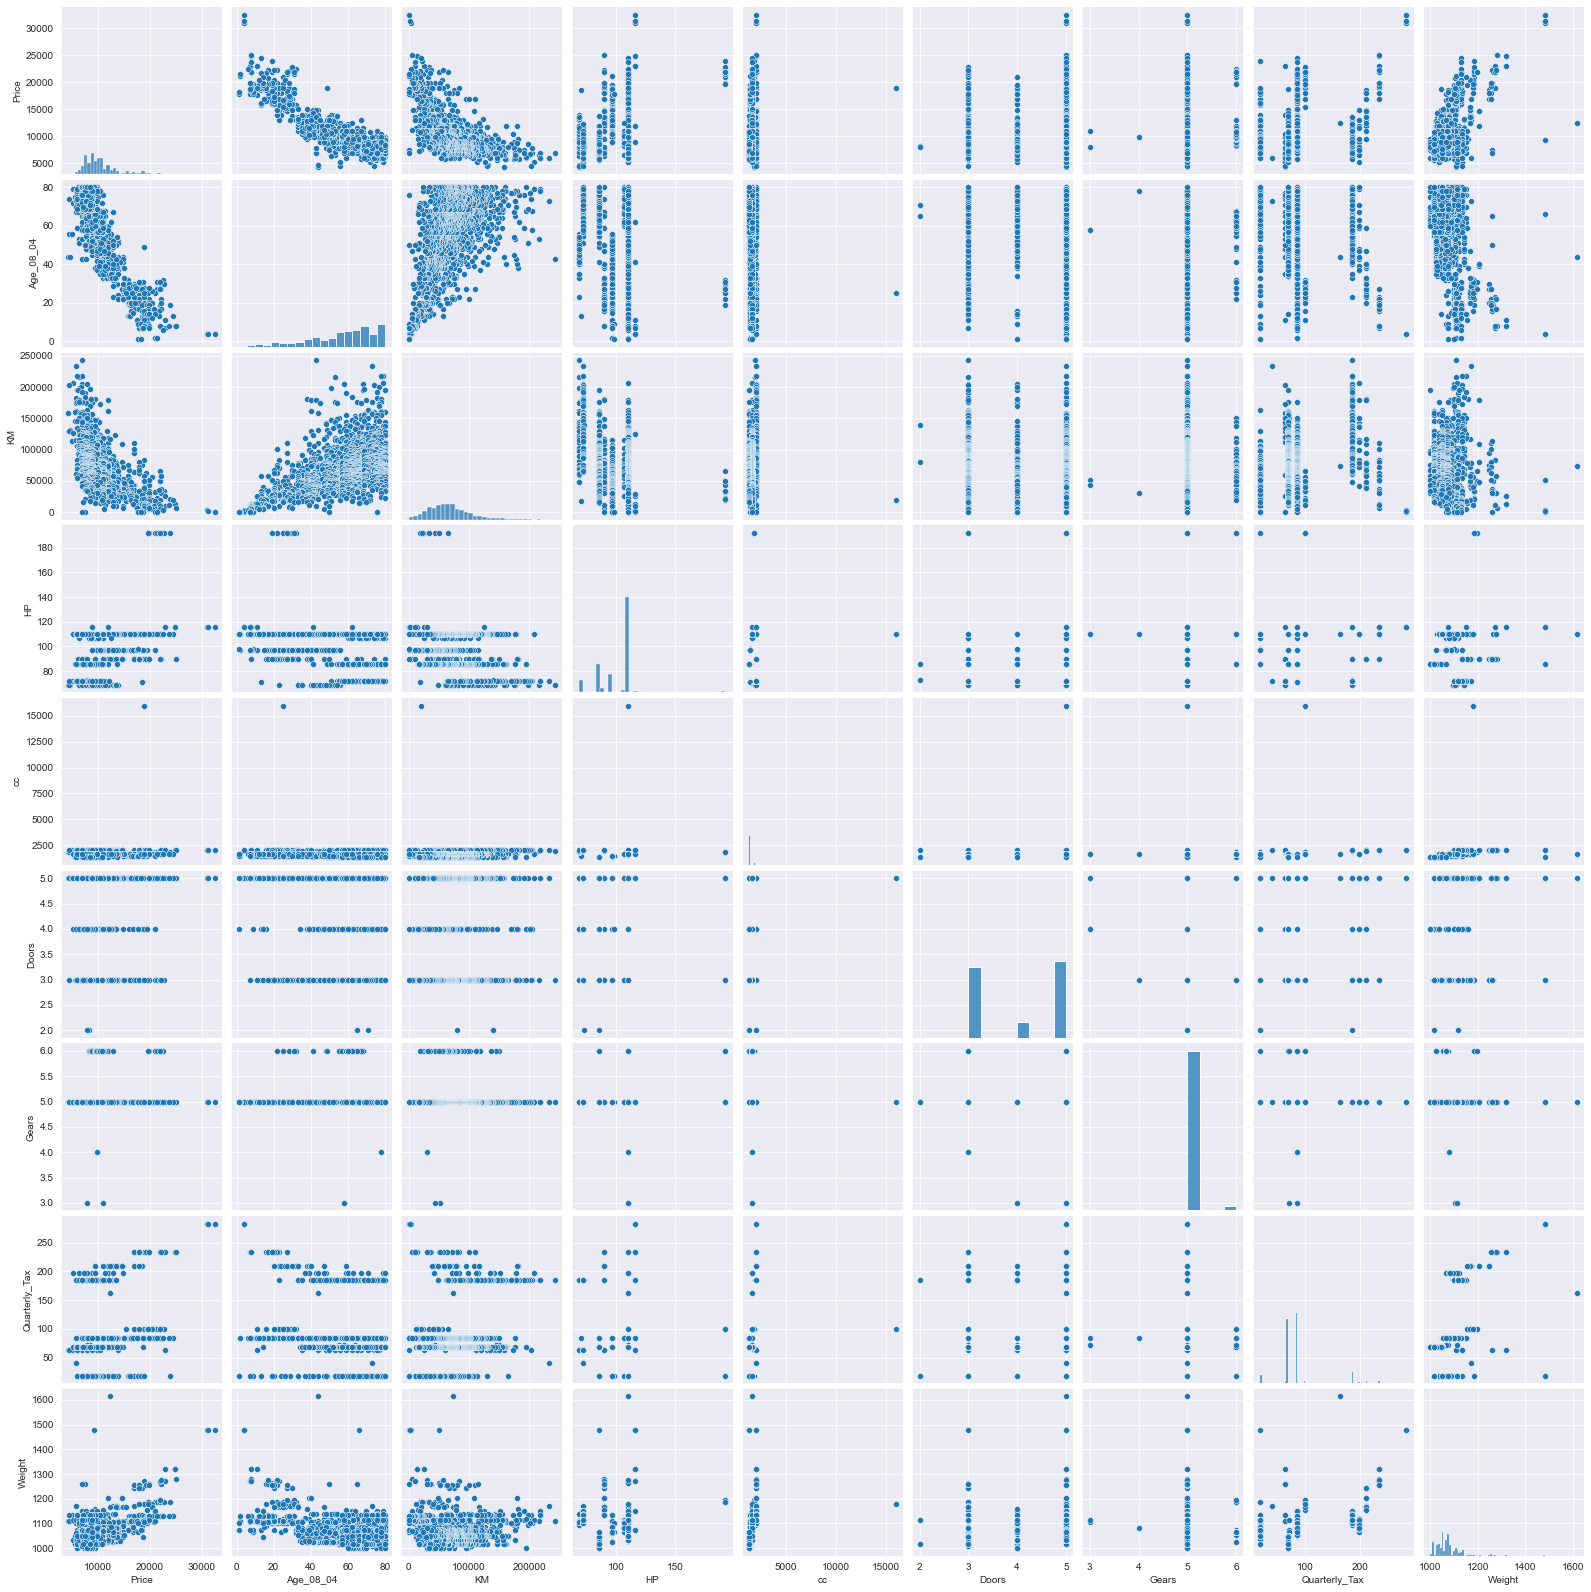

In [49]:
sns.pairplot(toyota1)
sns.set_style(style='darkgrid')

In [50]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit()

In [51]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [52]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [53]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [54]:
toyota1['Predicted']=model.fittedvalues
toyota1['Error']=model.resid
toyota1

C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_40788/2735081879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota1['Predicted']=model.fittedvalues
C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_40788/2735081879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota1['Error']=model.resid


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [60]:
rsq_age=smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Price~Age_08_04+KM+cc+HP+Gears+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Price~Age_08_04+KM+cc+Doors+HP+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('Price~Age_08_04+KM+cc+Doors+Gears+HP+Weight',data=toyota1).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+HP',data=toyota1).fit().rsquared
vif_wt=1/(1-rsq_wt)

d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age_08_04,2.917367
1,KM,6.149538
2,HP,6.743042
3,cc,7.330854
4,Doors,7.340128
5,Gears,7.293643
6,Quarterly_Tax,7.293689
7,Weight,6.237835


In [61]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

E:\Personal Docs\Python\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


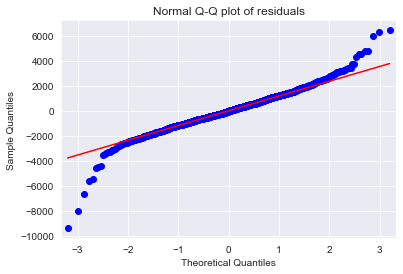

In [62]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

E:\Personal Docs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Error'>

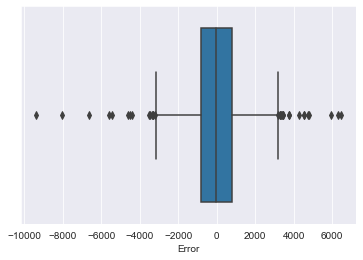

In [63]:
sns.boxplot(toyota1['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

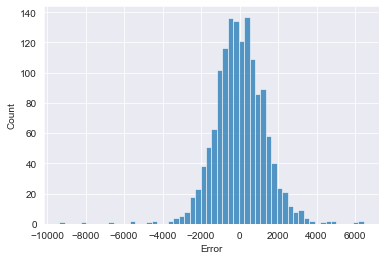

In [64]:
sns.histplot(toyota1['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

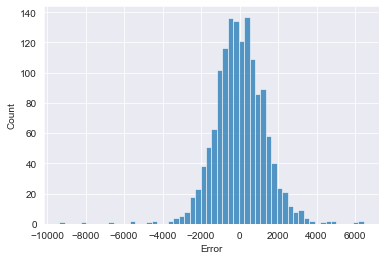

In [65]:
sns.histplot(toyota1['Error'])

In [66]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0       1.804216
1       1.643952
2       1.800701
3       1.689680
4       1.629138
          ...   
1431   -0.574651
1432   -0.723699
1433   -0.675355
1434   -0.638646
1435   -0.097419
Length: 1436, dtype: float64
0      -2.474430
1      -1.884148
2      -2.129439
3      -1.102913
4      -1.846847
          ...   
1431   -0.966411
1432    1.907533
1433    0.034138
1434   -0.992017
1435   -2.578901
Length: 1436, dtype: float64


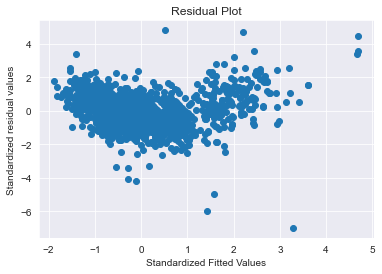

In [67]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

In [68]:
toyota1.shape

(1436, 11)

In [69]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

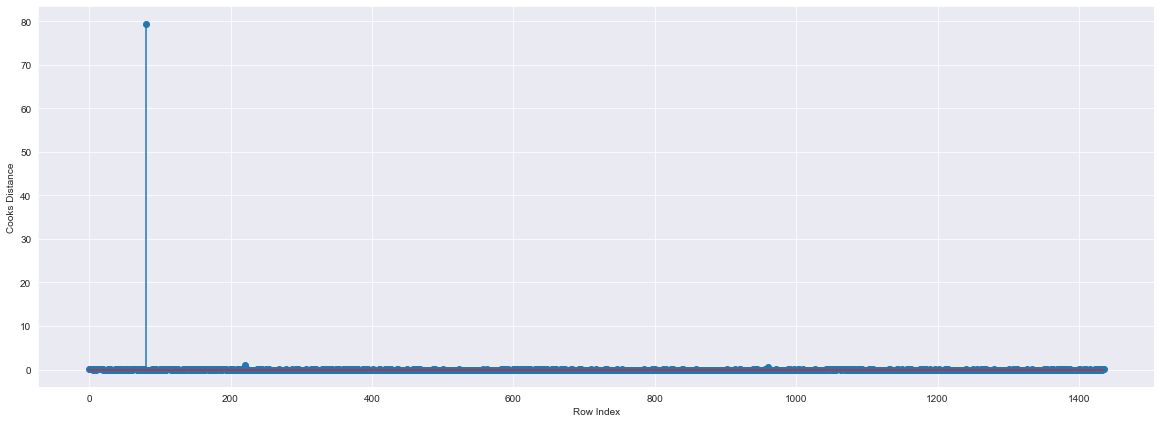

In [71]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
(np.argmax(c),np.max(c))

(80, 79.52010624138717)

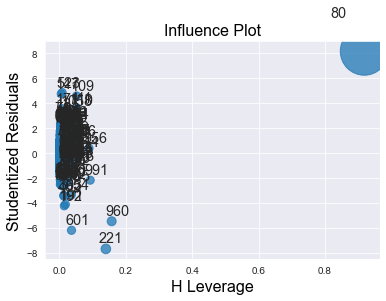

In [73]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [74]:
k=4
n=80
leverage_cutoff= 3*((k+1)/n)
leverage_cutoff

0.1875

In [76]:
toyota1[toyota1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Error
80,18950,25,20019,110,16000,5,5,100,1180,15885.600444,3064.399556


In [77]:
toyota1=toyota.drop(toyota.index[80],axis=0).reset_index()

In [78]:
toyota1.shape

(1435, 39)

In [79]:
toyota1=toyota1.drop(['index'],axis=1)
toyota1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [80]:
final_ml_v=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit()

In [81]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8693790488655818, 24687.28102432684)